In [216]:
import json
import py.myutils as my
import importlib
importlib.reload(my)
import json
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects
from matplotlib.ticker import MaxNLocator

#
def first_return_map(params, recalculate=True, recompile=True, scatter=True):
    script = "first_return_map"
    prefix = script
    params_str = json.dumps(params)
    #
    filename = prefix + " " + params_str
    filename = filename[:min(len(filename), 200)]
    filename_bin = f"output_bin/{filename}.bin"
    #
    if recalculate or not os.path.isfile(filename_bin):
        my.run_cpp(script, params=params_str, recompile=recompile)
    #
    # image
    v_, p_, t_return, zero_count = my.get_binary(filename_bin).copy()
    print(*zip(v_,p_))
    v_ = np.where(p_ == 0, np.nan, v_)
    # p_ = np.where(p_ == 0, np.nan, p_)
    # p_ = np.where(p_ == 0, np.nan, p_)
    diff_ = np.abs(np.diff(p_, prepend=p_[0]))
    discontinuities = (diff_ > 10*np.mean(diff_)) 
    p0 = np.where(discontinuities, np.nan, p_)
    t0 = np.where(discontinuities, np.nan, t_return)
    z0 = np.where(discontinuities, np.nan, zero_count)
    print(np.max(t_return))
    print(np.max(zero_count))
    t_return = np.where(t_return == 0, np.nan, t_return)
    fig, ax = plt.subplots()
    #
    ax.plot(v_, p_, c='b', lw=1, linestyle=':')
    ax.plot(v_, p0, c='b', lw=2)
    if scatter:
        ax.scatter(v_, p0, c='k', s=2)
    ax.plot(v_, v_*0, c='k')
    ax.plot(v_, v_,   c='k')
    ax.set_ylabel('$|p|$', color='b', rotation=0)
    ax.tick_params(axis='y', labelcolor='b')
    ax.dataLim.y1 = np.nanmax(p_)*1.05
    # ax.dataLim.y1 = 2 
    #
    ax_t = ax.twinx()
    ax_t.plot(v_, t_return, c='r', lw=1, linestyle=':')
    ax_t.plot(v_, t0, c='r', lw=2)
    ax_t.set_ylabel('t_0', color='r', rotation=0)
    ax_t.tick_params(axis='y', labelcolor='r')
    ax_t.dataLim.y0 = 0 
    #
    ax_z = ax.twinx()
    ax_z.plot(v_, z0, c='orange')
    ax_z.plot(v_, zero_count, c='orange', lw=1, linestyle=':')
    ax_z.set_ylabel('zero count', color='orange')
    ax_z.tick_params(axis='y', labelcolor='orange')
    ax_z.spines.right.set_position(("axes", 1.15))
    ax_z.dataLim.y0 = 0 
    ax_z.yaxis.set_major_locator(MaxNLocator(integer=True))
    fig.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000, bbox_inches='tight', pad_inches=0.1)
    # os.system(f"kitten icat 'output_img/{filename}.jpg'")
    # plt.clf()

def single_solution(params, recalculate=True, recompile=True, scatter=True):
    script = "single_solution"
    prefix = script
    params_str = json.dumps(params)
    #
    filename = prefix + " " + params_str
    filename = filename[:min(len(filename), 200)]
    
    filename_bin = f"output_bin/{filename}.bin"
    #
    if recalculate or not os.path.isfile(filename_bin):
        my.run_cpp(script, params=params_str, recompile=recompile)
        
        
    #
    # just solution
    x_, dx_, t_ = my.get_binary(filename_bin)
    # plt.clf()
    plt.plot(t_, x_)
    plt.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000)
    # os.system(f"kitten icat 'output_img/{filename}.jpg'")

    # # parametric
    # x_, dx_, t_ = my.get_binary(f"output_bin/{filename}.bin")
    # plt.clf()
    # plt.plot(x_, dx_)
    # plt.savefig(f"output_img/{filename} (phase space projection).jpg", format="jpg", dpi=1000)
    # # os.system(f"kitten icat 'output_img/{filename}.jpg'")


In [53]:

# params = dict(
#         size = 100,
#         mode = "l1l2", 
#         x_start = -5, x_finish = 5,
#         y_start = -5, y_finish = 5,
#         d = -1, tau = 1,
#         v_start = 0.01, v_finish = 10, v_n = 50,
#         t_finish = 25, h = 0.01,
# )






In [221]:
recalculate = recompile = True


In [165]:

recalculate = recompile = False

In [222]:
params = dict(
        size = 100,
        mode = "reim", 
        x_start = -2, x_finish = 2,
        y_start = 0, y_finish = 10,
        d = 1, tau = 1,
        v_start = 0.01, v_finish = 10, v_n = 5000,
        t_finish = 25, h = 0.01,
)

~~~ cpp/fixed_points_count.cpp is executed ~~~
~~~  parameters: {"size": 100, "mode": "reim", "x_start": -2, "x_finish": 2, "y_start": 0, "y_finish": 10, "d": 1, "tau": 1, "v_start": 0.01, "v_finish": 10, "v_n": 5000, "t_finish": 25, "h": 0.01} ~~~
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@~~~ Computation took 0:5:4 (hh:mm:ss) ~~~


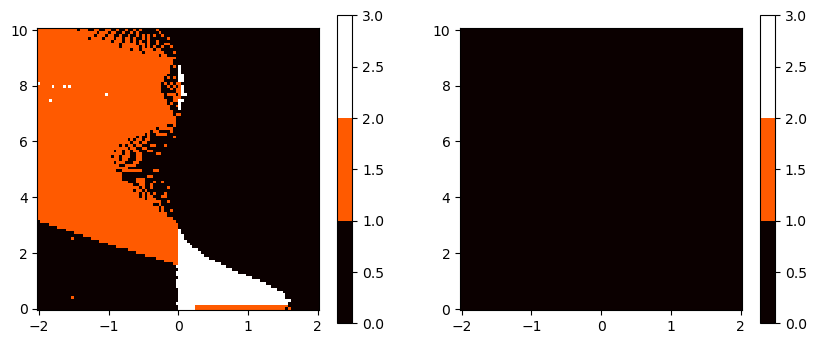

In [170]:


# params = dict(
#         size = 100,
#         mode = "l1l2", 
#         x_start = -5, x_finish = 5,
#         y_start = -5, y_finish = 5,
#         d = 1, tau = 1,
#         v_start = 0.01, v_finish = 10, v_n = 500,
#         t_finish = 25, h = 0.01,
# )



script = "fixed_points_count"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename = filename[:min(len(filename), 200)]
filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)

# data
filename = prefix + " " + params_str
count_stable, count_unstable = my.get_binary(f"output_bin/{filename}.bin").copy()
count_stable = count_stable.T;
count_unstable = count_unstable.T;
xs = np.linspace(params["x_start"], params["x_finish"], params["size"])
ys = np.linspace(params["y_start"], params["y_finish"], params["size"])
# figure
fig, ax = plt.subplots(1,2, figsize=(10,4))
vmax=3
cmap = plt.get_cmap('hot', vmax)
im = ax[0].pcolormesh(xs, ys, count_stable, cmap=cmap, vmin=0,vmax=vmax)
plt.colorbar(im,ax=ax[0])
im = ax[1].pcolormesh(xs, ys, count_unstable, cmap=cmap,vmin=0,vmax=vmax)
plt.colorbar(im,ax=ax[1])

ax[0].set_aspect((params["x_finish"]-params["x_start"])/((params["y_finish"]-params["y_start"])))
ax[1].set_aspect((params["x_finish"]-params["x_start"])/((params["y_finish"]-params["y_start"])))

# saving
fig.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000, bbox_inches='tight', pad_inches=0.1)
# os.system(f"kitten icat 'output_img/{filename}.jpg'")



In [223]:
# l1=2
# l2=1
# params.update(
#         b = -(l1+l2),
#         c = l1*l2,
#         v_n = 50000
# )

re=-1
im=4
params.update(
        b = -2 * re,
        c = re*re + im*im,
        # v_n = 5000,
        v_finish = 0.025,
        expspace=True
)

first_return_map(params, recalculate=recalculate, recompile=recompile)

~~~ cpp/first_return_map.cpp is executed ~~~
~~~  parameters: {"size": 100, "mode": "reim", "x_start": -2, "x_finish": 2, "y_start": 0, "y_finish": 10, "d": 1, "tau": 1, "v_start": 0.01, "v_finish": 0.025, "v_n": 5000, "t_finish": 25, "h": 0.01, "b": 2, "c": 17, "expspace": true} ~~~
~~~ Computation took 0:0:0 (hh:mm:ss) ~~~


FileNotFoundError: [Errno 2] No such file or directory: 'output_bin/first_return_map {"size": 100, "mode": "reim", "x_start": -2, "x_finish": 2, "y_start": 0, "y_finish": 10, "d": 1, "tau": 1, "v_start": 0.01, "v_finish": 0.025, "v_n": 5000, "t_finish": 25, "h": 0.01, "b": 2, "c": 17, "expspace": true}.bin'

~~~ cpp/single_solution.cpp is executed ~~~
~~~  parameters: {"size": 100, "mode": "reim", "x_start": -2, "x_finish": 2, "y_start": 0, "y_finish": 10, "d": 1, "tau": 1, "v_start": 0.01, "v_finish": 0.025, "v_n": 5000, "t_finish": 3, "h": 0.01, "b": 2, "c": 17, "expspace": true, "v": 0.01009761964822214} ~~~


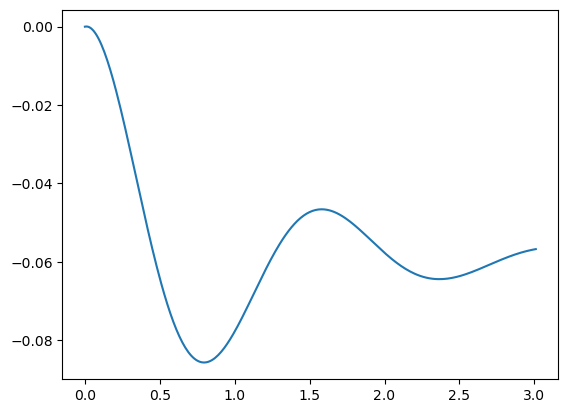

In [217]:
params.update(
    v = 0.01009761964822214,
    t_finish=3,
)
single_solution(params, recalculate=recalculate, recompile=recompile)


~~~ cpp/first_return_map.cpp is executed ~~~
~~~  parameters: {"size": 100, "mode": "reim", "x_start": -0.2, "x_finish": 0.4, "y_start": 0, "y_finish": 10, "d": -1, "tau": 1, "v_start": 0.01, "v_finish": 30, "v_n": 500, "t_finish": 25, "h": 0.01, "b": 0.4, "c": 36.04, "expspace": true} ~~~
~~~ Computation took 0:0:0 (hh:mm:ss) ~~~
3.201919601724321
54.0


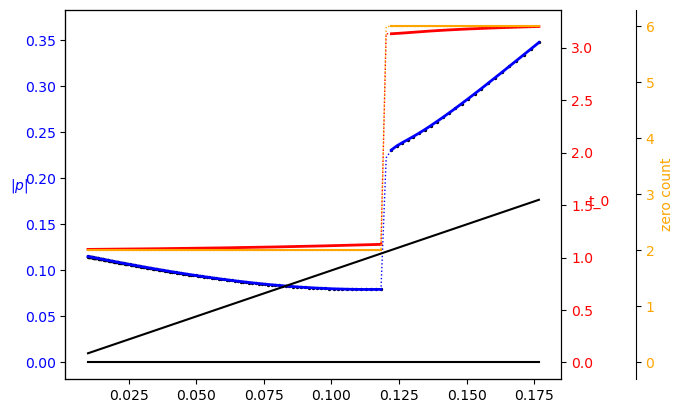

In [76]:
re=-0.2
im=6
params.update(
        b = -2 * re,
        c = re*re + im*im,
        v_n = 5000,
        expspace=True
)
first_return_map(params, recalculate=recalculate, recompile=recompile)

params = dict(
    # b = -0.2, c = 1, d = 1, tau = 1, 
    v = 1,
    # t_finish = 50, h = 0.01, comment = "lorenz attractor"
)
#



False

2.326720153168277
3.0


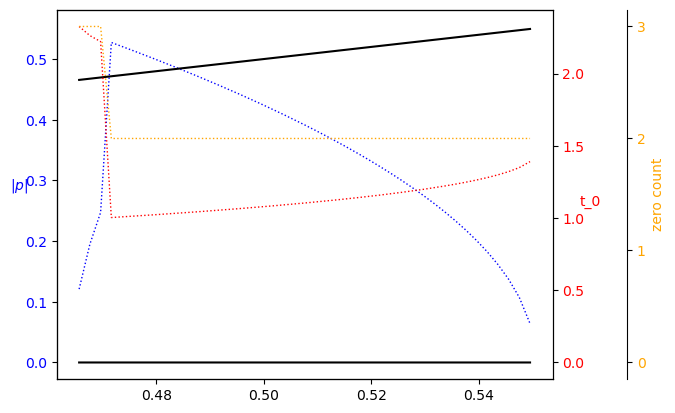

In [148]:
script = "first_return_map"
prefix = script
params_str = json.dumps(params)
#
filename = prefix + " " + params_str
filename_bin = f"output_bin/{filename}.bin"
#
if recalculate or not os.path.isfile(filename_bin):
    my.run_cpp(script, params=params_str, recompile=recompile)
#
# image
v_, p_, t_return, zero_count = my.get_binary(filename_bin).copy()
v_ = np.where(p_ == 0, np.nan, v_)
# p_ = np.where(p_ == 0, np.nan, p_)
# p_ = np.where(p_ == 0, np.nan, p_)
diff_ = np.abs(np.diff(p_, prepend=p_[0]))
discontinuities = (diff_ > 10*np.mean(diff_)) 
p0 = np.where(discontinuities, np.nan, p_)
t0 = np.where(discontinuities, np.nan, t_return)
z0 = np.where(discontinuities, np.nan, zero_count)
print(np.max(t_return))
print(np.max(zero_count))
t_return = np.where(t_return == 0, np.nan, t_return)
fig, ax = plt.subplots()
#
ax.plot(v_, p0, c='b', lw=2)
ax.plot(v_, p_, c='b', lw=1, linestyle=':')


ax.plot(v_, v_*0, c='k')
ax.plot(v_, v_,   c='k')
ax.set_ylabel('$|p|$', color='b', rotation=0)
ax.tick_params(axis='y', labelcolor='b')
ax.dataLim.y1 = np.nanmax(p_)*1.05
# ax.dataLim.y1 = 2 
#
ax_t = ax.twinx()
ax_t.plot(v_, t_return, c='r', lw=1, linestyle=':')
ax_t.plot(v_, t0, c='r', lw=2)
ax_t.set_ylabel('t_0', color='r', rotation=0)
ax_t.tick_params(axis='y', labelcolor='r')
ax_t.dataLim.y0 = 0 
#
ax_z = ax.twinx()
ax_z.plot(v_, z0, c='orange')
ax_z.plot(v_, zero_count, c='orange', lw=1, linestyle=':')
ax_z.set_ylabel('zero count', color='orange')
ax_z.tick_params(axis='y', labelcolor='orange')
ax_z.spines.right.set_position(("axes", 1.15))
ax_z.dataLim.y0 = 0 
ax_z.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.savefig(f"output_img/{filename}.jpg", format="jpg", dpi=1000, bbox_inches='tight', pad_inches=0.1)

# for i in p_:
#     print(i)

In [205]:
os.path.isfile(r"\\?\\home\dbain\signu\signu 2024\relay-dde-2nd-order\test.txt")

False

In [198]:
os.system("pwd")

/home/dbain/signu/signu 2024/relay-dde-2nd-order


0